#### 1-Importamos las librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
DF = pd.read_csv("DataSourceTL2-RLM/articulos_ml.csv") #Armamos un Data Frame con nuestros datos de entrada.
#URL para descargar el CSV: https://www.aprendemachinelearning.com/articulos_ml/
DF.shape #Vemos sus dimensiones (tiene 161 Filas/registros x 8 columnas/features)

(161, 8)

In [13]:
#Veamos los primeros 10 registros y todas las columnas (las 8):
DF.head(10) 
#Los que no tienen URL (tienen 'Nan') es porque son inventados, NO son reales. 

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
5,5 ways Data Science and Machine Learning impac...,NaN,761,0,NaN,1,14,21000
6,200 universities just launched 600 free online...,https://qz.com/1120344/200-universities-just-l...,6462,600,28.0,2,170,200000
7,How Machine Learning can help Cryptocurrency T...,https://cryptovest.com/news/how-machine-learni...,753,3,0.0,1,78,77000
8,Tech companies should stop pretending AI won’t...,https://www.technologyreview.com/s/610298/tech...,1118,2,NaN,1,62,59400
9,Artificial intelligence is going to completely...,NaN,1581,4,NaN,2,60,35000


#### 2-Análisis estadístico de nuestros datos:

In [14]:
DF.describe() #Media, min, max.

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In [15]:
#Observamos que la media de palabras en los artículos es de 1808. El artículo más corto tiene 250 palabras 
#y el más extenso 8401. 
    
#Eliminamos 3 features que no nos parecen de tanta importancia para predecir el #shares:
DF.drop(columns=['Title', 'url', 'Elapsed days'],inplace=True) #inplace=True para que los datos se borren efectivamente del DF, sino tendriamos que asignar a otra variable el nuevo DF con los valores dropeados.

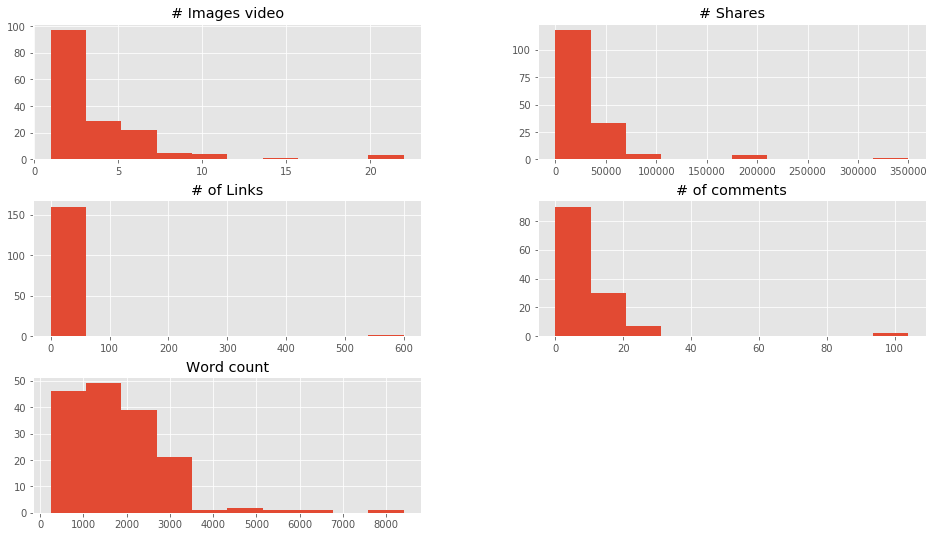

In [16]:
#Visualizamos las features de entrada:
DF.hist()
plt.show() 

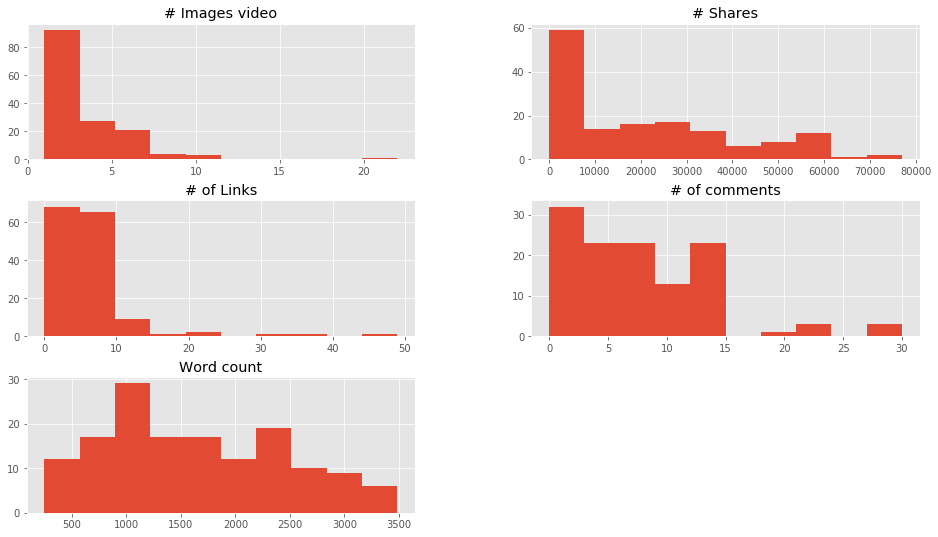

In [18]:
#Intentaremos si hay una correlación entre la cantidad de palabras del texto (Word count)
#y la cantidad de Shares obtenidos (#Shares) para predecir la misma. 

# Arriba podemos observar en què valores se concentran la mayorìa de los registros.
# 1ro vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500 y en el eje Y: entre 0 y 80.000.
# --> Haremos este recorte solo para las 2 variables que queremos analizar:
    
DF_Filtrado = DF[(DF['Word count'] <= 3500) & (DF['# Shares'] <= 80000)]

DF_Filtrado.hist()
plt.show()
#Obviamente observamos menos valores para cada feature ya que filtramos. 

In [20]:
DF_Filtrado.shape   #Vemos la dimensiòn de nuestro nuevo DF (filtramos registros y tambien 3 columnas)

(148, 5)

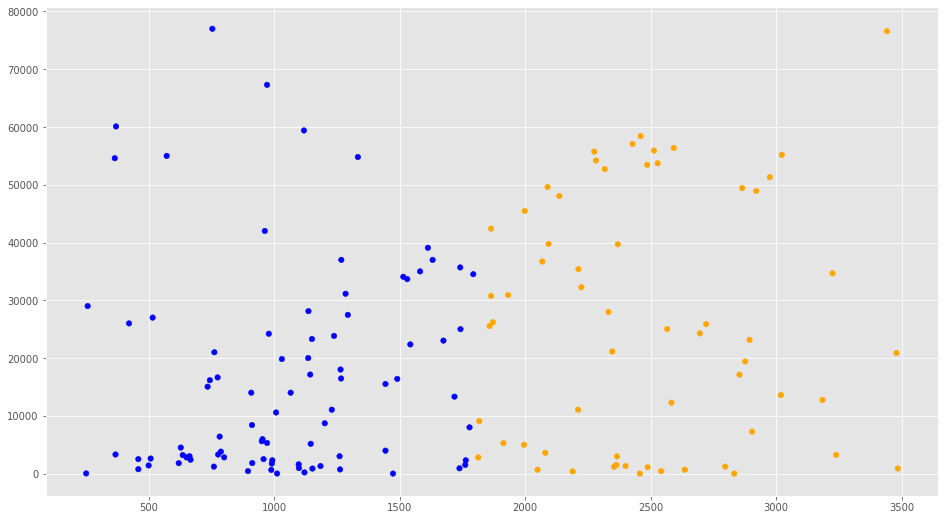

In [23]:
#Graficamos # SHares (Y) en funciòn de WOrd COunt (X) para ver si existe una relaciòn lineal entre ambas variables y asì ver si podemos aplicar RL:

#En el for pintamos en colores los puntos por debajo (en azul) y por encima (en naranja)
#de la media (mean) de Cantidad de Palabras (1808, que la calculamos anteriormente).

colores=['orange','blue']
tamanios=[30,60]

f1 = DF_Filtrado['Word count'].values
f2 = DF_Filtrado['# Shares'].values

asignar=[]
for index, row in DF_Filtrado.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

#### 3-Regresiòn Lineal Simple.

In [29]:
#Vemos que no hay una distribuciòn muy lineal, pero igualmente utilizamos regresiòn lineal simple para obtener
#resultados/predicciones:

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =DF_Filtrado[["Word count"]]
X_train = np.array(dataX)
y_train = DF_Filtrado['# Shares'].values

RLS = linear_model.LinearRegression() # Creamos el objeto de Regresión Linear
RLS.fit(X_train, y_train) # Entrenamos nuestro modelo

y_pred = RLS.predict(X_train)  # Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)

#Imprimimos los coeficientes y scores obtenidos:
print('Coeficiente RL:', RLS.coef_) #Serìan coeficienteS si fuera RLM.
print('Termino independiente:', RLS.intercept_) # Este es el valor donde corta el eje Y (en X=0)
print("MSE: %.2f" % mean_squared_error(y_train, y_pred)) # Error Cuadrado Medio
print('Variance score: %.2f' % r2_score(y_train, y_pred)) # Coeficiente de correlaciòn. El mejor puntaje es un 1.0.

#VER ESTO DE VARIANCE SCORE SI ES LO QUE DECIA IMA.

Coeficiente RL: [5.69765366]
Termino independiente: 11200.303223074163
MSE: 372888728.34
Variance score: 0.06


In [29]:
#De esta manera ahora podemos graficar la recta del modelo lineal --> y = mX + b 
#Donde m (coeficiente) = 5.69 y b (termino indep)=11200.

#VER COMO AGREGAR ESTA LINEA ENCIMA DEL GRAFICO ANTERIOR, CREO QUE LUCAS LO HIZO: 5.69*x+11200

#Igualmente vemos que tenemos un MSE ENORME... por lo que el modelo NO serà muy bueno.
#Esto tambien lo vemos reflejado en el Variance score de 0.06, MUY pequeño (deberìa ser cercano a 1)


#### 4-Predicción con 1 variable.

In [31]:
#Vamos a intentar realizar una predicciòn (aunque como vimos nuestro modelo no es muy fiable).
#Vamos a predecir cuantos #SHares tendrà un articulo de ML de 2000 palabras:
y_DosMil=RLS.predict([[2000]]) #Ver despues porque los doble corchetes.
print(int(y_DosMil))

22595


In [ ]:
#Vemos que obtuvimos una predicción de 22595 #Shares para un artìculo de 2000 palabras 
#Pero como dijimos nuestro modelo no es muy fiable.

### 5-Regresiòn LIneal Mùltiple.

In [34]:
#Vamos a intentar mejorar el Modelo de RL que hicimos anteriormente, añadiendo una variable de entrada / dimensiòn màs al modelo.
#Esto le darà mayor poder al algoritmo de ML, ya que de esta manera podremos obtener predicciones más complejas basadas en más de 1 variable predictora / feature.

#Ahora nuestra ecuación de la "recta" pasa a ser: Y = b + m1 X1 + m2 X2 + … + m(n) X(n)
#y DEJA de ser una recta, ahora es un PLANO.

#En nuestro caso utilizaremos 2 variables predictivas para poder graficar un plano 3D 
#(Pero recordemos que podemos realizar mejores predicciones utilizando màs de 2 entradas y prescindir del gràfico... ya que màs de 3D no podemos graficar)

#Nuestra 1ra variable de entrada seguirà siendo la cantidad de palabras ("Word COunt")
#Y nuestra 2da variable serà la SUMA de 3 columnas / features de entrada: 
            #los enlaces, comentarios e imágenes
suma = (DF_Filtrado["# of Links"] + DF_Filtrado['# of comments'].fillna(0) + DF_Filtrado['# Images video'])

dataX2 =  pd.DataFrame()
#Ahora dataX2 serà un DF de 2 posiciones, dividimos en 2 para agregar las columnas a dataX2:
dataX2["Word count"] = DF_Filtrado["Word count"]
dataX2["suma"] = suma

#Realizamos el entrenamiento en base a nuestras 2 variables predictivas (contenidas en dataX2)
XY_train = np.array(dataX2)
z_train = DF_Filtrado['# Shares'].values

#NOta: hubiera sido mejor aplicar PCA para reducir las dimensiones manteniendo la información más importante de todas:
#VER ESTO PARA ESO desp -->https://www.aprendemachinelearning.com/comprende-principal-component-analysis/
#Ver si hace referencia al DF_Filtrado o a la elecciòn de las variables.

#Ahora ya tenemos nuestras 2 variables de entrada en XY_train y 
#nuestra variable de salida que pasa de ser 'Y' a ser el eje 'Z'

In [35]:
#Creamos un nuevo objeto de Regresión lineal con SKLearn pero esta vez
#tendrá las 2 dimensiones que entrenar: las que contiene XY_train. 
#Y, al igual que antes, imprimimos los coeficientes y puntajes obtenidos:

# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones para asi obtener nuestro plano.
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

print('Coefficients:', regr2.coef_) # Los coeficientes (tenemos 2 ahora envés de 1 como en RLS).
print("MSE: %.2f" % mean_squared_error(z_train, z_pred)) # Error cuadrático medio
print('Variance score: %.2f' % r2_score(z_train, z_pred)) # Evaluamos el puntaje de varianza / coeficiente de correlaciòn (siendo 1.0 el mejor posible)

Coefficients: [   6.63216324 -483.40753769]
MSE: 352122816.48
Variance score: 0.11


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

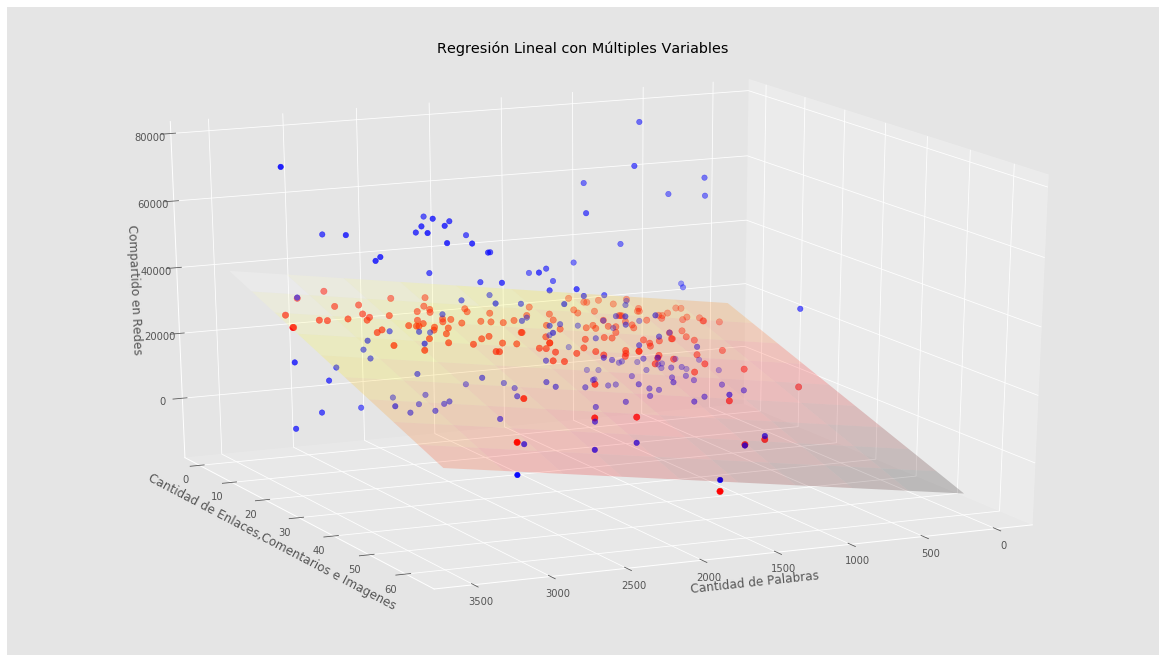

In [39]:
#Como vemos, obtenemos 2 coeficientes (cada uno correspondiente a nuestras 2 variables predictivas), 
#pues ahora lo que graficamos no será una linea si no, un plano en 3 Dimensiones.

#El error obtenido sigue siendo grande, aunque algo mejor que el anterior 
#y el puntaje de Varianza mejora casi el doble del anterior (aunque sigue siendo muy malo, muy lejos del 1).
#Por esto nuestro modelo tampoco serà fiable para realizar predicciones.

fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot') # Graficamos el plano
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30) # Graficamos en azul los puntos del entrenamiento.
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40) # Graficamos en rojo, los puntos de la predicciòn.
#Dependiendo de la "oscuridad" del punto depende su ubicaciòn (si es màs oscuro se encuentra màs "hacia nosotros"; y si es màs claro se encuentra "al fondo")

ax.view_init(elev=20., azim=65) # con esto situamos la "camara" con la que visualizamos
#Variando los numeros de arriba podemos rotar el gràfico para apreciar el plano desde diversos ángulos.

ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

#### 6-Predicciòn con varias variables.

In [42]:
# Ahora vamos a ver què predicciòn tenemos (el nùmero de Shares) para un artículo de 2000 palabras, con 10 enlaces, 4 comentarios y 6 imágenes:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518


In [34]:
#Esta predicción nos dá 20518. Probablemente sea un poco mejor que nuestra predicción anterior 
#con 1 variable pero igualmente como vimos nuestro modelo lineal NO es fiable (por los coeficientes anteriormente vistos).

#### 7-Conclusiones

In [ ]:
#De esta manera vimos como crear con SKLEARN en Python modelos de RL con 1 o mùltiples variables.
#En este ejemplo NO tuvimos una gran confianza en las predicciones:
#Por ejemplo en nuestro primer modelo de RLS, con 2000 palabras nos predice que podemos tener 22595 
#pero el margen de error haciendo raíz del error cuartico medio es más menos 19310. Es decir que 
#escribiendo un artículo de 2000 palabras lo mismo tenemos 3285 Shares que 41905. 
#Y para nuestro 2do modelo (RLM), donde agregamos otra dimensión mas, mejoramos un poco el error y los coeficientes 
#pero igualmente no fue muy alto, con lo que nuestro modelo no tendrà mucha confianza en sus predicciones (pero si más que la RLS que realizamos en el 1er modelo). 

#RLS y RLM no nos sirvieron para nuestros datos, pero seguramente hayan muchìsimos Data Sets donde
#la RL dè predicciones acertadas.

#Mejoras de nuestro modelo: 
        #1-Utilizar más dimensiones para ver si mejoramos nuestro modelo.
        #2-Encontrar mejores datos de entrada, esto lo podemos hacer realizando 
        #la matriz de correlaciòn para ver las relaciones entre variables y buscar las mas lineales entre si 
        #(ya que anteriormente elegimos las variables predictoras "al azar").
#Para saber: también es posible, que no exista ninguna relación entre nuestras variables de entrada y el éxito en Shares del artículo… 
#con lo cual… nunca podremos predecir con certeza esta salida. Esto fue solo un experimento